In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

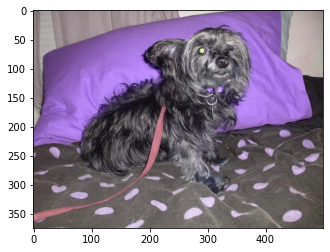

In [2]:
DATADIR = "E:/AI/Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)) # , cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        plt.show()
        break
    break

In [3]:
print(img_array.shape)


(375, 500, 3)


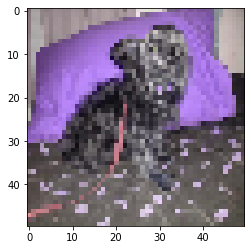

In [4]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array) # , cmap='gray'
plt.show()

In [13]:
training_data = []

def create_training_data():
    for index, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        class_num = index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [11]:
print(len(training_data))

24946


In [15]:
import random
random.shuffle(training_data)

In [16]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
0
0
0
1
0


In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) # 1 For Grayscale. In reshape function we are telling to create matrices 
# by (img_size, img_size) size and setting -1 as the 1st param means, make as many 2d matrices can be made of that size. We are
# leaving that up to the function.

In [25]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [26]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [27]:
X.shape # 24946 50X50 size Grayscale images

(24946, 50, 50)